In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, SparsePCA

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
import lightgbm as lgb


## Data preprocessing

In [2]:
#X_new and y_new came from train.csv
X = pd.read_csv('/Users/mercuryliu/Documents/Kaggle/ga-customer-revenue-prediction/X_new.csv').drop('Unnamed: 0', axis=1)
y = pd.read_csv('/Users/mercuryliu/Documents/Kaggle/ga-customer-revenue-prediction/y_new.csv').drop('Unnamed: 0', axis=1)


### Transformation on Y

In [3]:
#transform y to the submission form
y_log = np.log(y + 1)

### Transformation on X through PCA

In [4]:
#I split the data into two ways:
#1) using 1% of traning data, 2)using 10% of traning data
#apply gridsearch PCA to both of them
#if the results of optimal number of "n_components" are the same
#then I can determine the optimal number of dimensionality reduction
X_cv1,X_cv2, y_cv1, y_cv2 = train_test_split(X, y_log, test_size=0.99, random_state=42)
X_cv3, X_cv4, y_cv3, y_cv4 = train_test_split(X, y_log, test_size=0.9, random_state=42)

In [5]:
pca = PCA(n_components=120)
forest = RandomForestRegressor(n_estimators=20)

pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

param_dict = {"pca__n_components":[5, 10, 20],
              "forest__n_estimators":[5, 10, 30, 50]}

estimator = GridSearchCV(pipe,
                         param_dict,
                         verbose=2)

In [6]:
#gridsearch CV with 1% of the training data 
estimator.fit(X_cv1, y_cv1)
print("The best parameters: {0}".format(estimator.best_params_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=10 ....................
[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=5, pca__n_components=10 ....................
[CV] ..... fores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=10 ...................
[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=10 ...................
[CV] .

/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarn

[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=20 ...................
[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=20 ...................
[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.0s
[CV] forest__n_estimators=10, pca__n_components=20 ...................
[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarn

[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=10 ...................
[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=10 ...................
[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=10 ...................
[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=10 ...................
[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=10 ...................
[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.0s
[CV] forest__n_estimators=30, pca__n_components=20 ...................
[CV] .

/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarn

[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=30, pca__n_components=20 ...................
[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=30, pca__n_components=20 ...................
[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarn

[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarn

[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=10 ...................
[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=10 ...................
[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=10 ...................
[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................
[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................
[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................
[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.1s
The best parameters: {'forest__n_estimators': 30, 'pca__n_components': 10}


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s finished
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [7]:
#gridsearch CV with 10% of the training data
estimator.fit(X_cv3, y_cv3)
print("The best parameters: {0}".format(estimator.best_params_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=5 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=5 .....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=5 .....................
[CV] ...... forest__n_estimators=5, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=10 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=10 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=10 ....................
[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=10 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=10 ....................
[CV] ..... forest__n_estimators=5, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=20 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=20 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=20 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=20 ....................
[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=5, pca__n_components=20 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=5, pca__n_components=20, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=5 ....................
[CV] ..... forest__n_estimators=10, pca__n_components=5, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=10 ...................
[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=10 ...................
[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=10, total=   0.1s
[CV] forest__n_estimators=10, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.2s
[CV] forest__n_estimators=10, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.3s
[CV] forest__n_estimators=10, pca__n_components=20 ...................
[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.2s
[CV] forest__n_estimators=10, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.2s
[CV] forest__n_estimators=10, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=10, pca__n_components=20, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.2s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.2s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=30, pca__n_components=5, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.4s
[CV] forest__n_estimators=30, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.4s
[CV] forest__n_estimators=30, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.3s
[CV] forest__n_estimators=30, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=10, total=   0.4s
[CV] forest__n_estimators=30, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.6s
[CV] forest__n_estimators=30, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.7s
[CV] forest__n_estimators=30, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.5s
[CV] forest__n_estimators=30, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.5s
[CV] forest__n_estimators=30, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=30, pca__n_components=20, total=   0.7s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=5 ....................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] ..... forest__n_estimators=50, pca__n_components=5, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.6s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.6s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.5s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.4s
[CV] forest__n_estimators=50, pca__n_components=10 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=10, total=   0.6s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   1.1s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   1.3s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.9s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   0.8s
[CV] forest__n_estimators=50, pca__n_components=20 ...................


/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV] .... forest__n_estimators=50, pca__n_components=20, total=   1.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.7s finished
/Users/mercuryliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameters: {'forest__n_estimators': 50, 'pca__n_components': 20}


In [8]:
#actually, selecting different prooportions of data for gridsearch CV gives different results
#I will arbitrarily choose the one that uses 10% of the training data 
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

### Test Train Data Split 

In [9]:
#dataset with PCA on X
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_log, test_size=0.3, random_state=42)

#dataset without PCA on X
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_log, test_size=0.3, random_state=42)

In [10]:
#remeber to reshape y to 1d array, otherwise warning message would be raised
y_train = y_train.to_numpy().reshape(44301,)
y_test = y_test.to_numpy().reshape(len(y_test),)

y_train1 = y_train1.to_numpy().reshape(44301,)
y_test1 = y_test1.to_numpy().reshape(len(y_test1),)

### Gradient Boosting with Sklearn

In [11]:
#gb model with data(w PCA), this is a basic model for further parameter tuning
prmt = {
    "loss": 'ls',
    "learning_rate": 0.01,
    "criterion": 'mse',
    "n_estimators": 30,
    "random_state": 42
}
gbr = GradientBoostingRegressor()
gbr.set_params(**prmt)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(criterion='mse', learning_rate=0.01, n_estimators=30,
                          random_state=42)

In [12]:
g_prediction = gbr.predict(X_test)
g_error = mean_squared_error(y_test, g_prediction)
print('The mean square error(MSE) of the model trained with data after PCA is {}.'.format(g_error))

The mean square error(MSE) of the model trained with data after PCA is 3.3919863137708237.


In [13]:
#gb model with data(w/o PCA)
prmt1 = {
    "loss": 'ls',
    "learning_rate": 0.01,
    "criterion": 'mse',
    "n_estimators": 30,
    "random_state": 42  
}
gbr1 = GradientBoostingRegressor()
gbr1.set_params(**prmt1) #at first I did not know to add "**", then a key error was raised

gbr1.fit(X_train1, y_train1)


GradientBoostingRegressor(criterion='mse', learning_rate=0.01, n_estimators=30,
                          random_state=42)

In [14]:
g_prediction1 = gbr1.predict(X_test1)
g_error1 = mean_squared_error(y_test1, g_prediction1)
print('The mean square error(MSE) of the model trained with data w/o PCA is {}.'.format(g_error1))

The mean square error(MSE) of the model trained with data w/o PCA is 3.3802661177874063.


In [15]:
if g_error > g_error1:
    print("The model trained with data w/o PCA is better. But why?")
else:
    print("The model trained with data PCA is better.")

The model trained with data w/o PCA is better. But why?


## Model Tuning & Evaluation
#Since in the basic model, the performance of the model using data without PCA is better
#In the following model tuning process, all the data are without PCA
#parameters to tune are based on: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

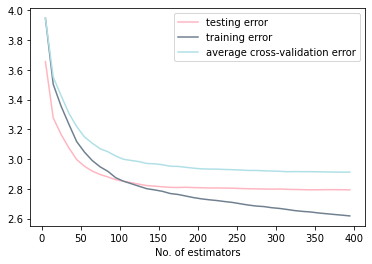

In [16]:
#step1: find the optimal amount of boosting stages, a.k.a. n_estimators 
#still use MSE as the criterion
#running time: 10 min or so
mse_train = []
mse_test = []
n_est = list(range(5, 400, 10))
cv_est = []

for i in n_est:
    model = GradientBoostingRegressor(\
        n_estimators = i,\
        loss='ls', \
        learning_rate=0.05,\
        criterion='mse', \
        max_features='sqrt', \
        random_state= 42)
    
    #part1: no cv
    model.fit(X_train1, y_train1) #fit model
    #calculate training error
    pred_train = model.predict(X_train1) 
    train_e = mean_squared_error(y_train1, pred_train) 
    mse_train.append(train_e)
    #calculate testing error
    pred_test = model.predict(X_test1) 
    test_e = mean_squared_error(y_test1, pred_test) 
    mse_test.append(test_e)
    
    #part2: same model & parameters, but do 3-fold cv on the data, get average MSE
    score = np.mean(cross_val_score(model, X_train1, y_train1, \
                                    cv=3, scoring ='neg_mean_squared_error'))
    cv_est.append(-score) #results all the scoring methods are non-negative numbers, so add"-" sign here

#plot three types of errors
plt.plot(n_est, mse_test, color='lightpink')
plt.plot(n_est, mse_train, color='slategrey')
plt.plot(n_est, cv_est, color='powderblue')

plt.xlabel('No. of estimators')
plt.legend(labels=['testing error', 'training error', 'average cross-validation error'])
plt.show()
#cv error is the highest bc cv fold is small (3-fold), left large chunk of data thus learning less
#but since the dataset is quite large, higher folds would be expensive computaitonally
#MSE stablizes after n_estimators > 250 

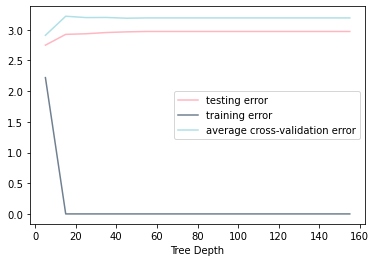

In [17]:
#step2: find the optimal tree depth
mse_tree_depth_train = []
mse_tree_depth_test = []

depth = list(range(5, 160, 10))
cv_depth = []

for i in depth:
    model = GradientBoostingRegressor(max_depth = i, \
                                      n_estimators= 250, loss='ls',\
                                      learning_rate=0.05, criterion='mse', \
                                      max_features='sqrt', random_state=42)
    #part1: no cv
    model.fit(X_train1, y_train1)
    #calculate training error
    pred_train = model.predict(X_train1)
    train_e = mean_squared_error(y_train1, pred_train)
    mse_tree_depth_train.append(train_e)
    
    #calculate testing error
    pred_test = model.predict(X_test1)
    test_e = mean_squared_error(y_test1, pred_test)
    mse_tree_depth_test.append(test_e)

    #part2: 3-fold cv 
    score = np.mean(cross_val_score(model, X_train1, y_train1, cv=3, \
                                    scoring ='neg_mean_squared_error'))
    cv_depth.append(-score)

plt.plot(depth, mse_tree_depth_test, color='lightpink')
plt.plot(depth, mse_tree_depth_train, color='slategrey')
plt.plot(depth, cv_depth, color='powderblue')

plt.xlabel('Tree Depth')
plt.legend(labels=['testing error', 'training error', 'average cross-validation error'])
plt.show()
#MSE is the lowest when tree_depth = 5

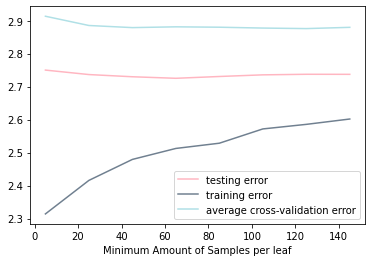

In [18]:
#step 3: find the optimal minimum amount of samples per leaf

mse_lf_train = []
mse_lf_test = []

min_sp = list(range(5, 150, 20))
cv_lf = []

for i in min_sp:
    model = GradientBoostingRegressor(min_samples_leaf= i, max_depth = 5, \
                                      n_estimators= 250, loss='ls',\
                                      learning_rate=0.05, criterion='mse', \
                                      max_features='sqrt', random_state=42)
    #part1: no cv
    model.fit(X_train1, y_train1) #fit model
    #calculate training error
    pred_train = model.predict(X_train1) 
    train_e = mean_squared_error(y_train1, pred_train) 
    mse_lf_train.append(train_e)
    #calculate testing error
    pred_test = model.predict(X_test1) 
    test_e = mean_squared_error(y_test1, pred_test) 
    mse_lf_test.append(test_e)
    
    #part2: 3-fold cv 
    score = np.mean(cross_val_score(model, X_train1, y_train1, cv=3, \
                                    scoring ='neg_mean_squared_error'))
    cv_lf.append(-score)

plt.plot(min_sp, mse_lf_test, color='lightpink')
plt.plot(min_sp, mse_lf_train, color='slategrey')
plt.plot(min_sp, cv_lf, color='powderblue')

plt.xlabel('Minimum Amount of Samples per leaf')
plt.legend(labels=['testing error', 'training error', 'average cross-validation error'])
plt.show()

#testing and training error stablize after min_sample_split > 60
#try min_samples_leaf=50

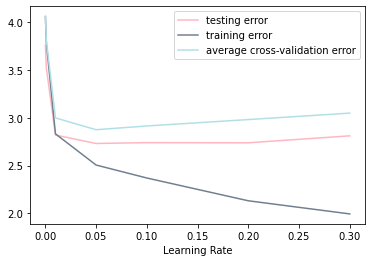

In [19]:
#step 4: find the optimal learning rate 
#if it learning rate is too small
#it will be computaitonally expensive given the size of the dataset

rate_train = []
rate_test = []
learning_rate = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
cv_rate = []

for i in learning_rate:
    model = GradientBoostingRegressor(learning_rate=i,\
                                      min_samples_leaf= 60, max_depth = 5, \
                                      n_estimators= 250, loss='ls',\
                                      criterion='mse', max_features='sqrt', random_state=42)
    #part1: no cv
    model.fit(X_train1, y_train1) #fit model
    #calculate training error
    pred_train = model.predict(X_train1) 
    train_e = mean_squared_error(y_train1, pred_train) 
    rate_train.append(train_e)
    #calculate testing error
    pred_test = model.predict(X_test1) 
    test_e = mean_squared_error(y_test1, pred_test) 
    rate_test.append(test_e)
    
    #part2: 3-fold cv 
    score = np.mean(cross_val_score(model, X_train1, y_train1, cv=3, \
                                    scoring ='neg_mean_squared_error'))
    cv_rate.append(-score)

plt.plot(learning_rate, rate_test, color='lightpink')
plt.plot(learning_rate, rate_train, color='slategrey')
plt.plot(learning_rate, cv_rate, color='powderblue')

plt.xlabel('Learning Rate')
plt.legend(labels=['testing error', 'training error', 'average cross-validation error'])
plt.show()

In [20]:
#current model, after model tuning
m10 = GradientBoostingRegressor(min_samples_leaf= 60, max_depth = 5, \
                                      n_estimators= 250, loss='ls',\
                                      learning_rate=0.05, criterion='mse', \
                                      max_features='sqrt', random_state=42)
m10.fit(X_train1, y_train1)
pred10 = m10.predict(X_test1)
error10 = mean_squared_error(y_test1, pred10)


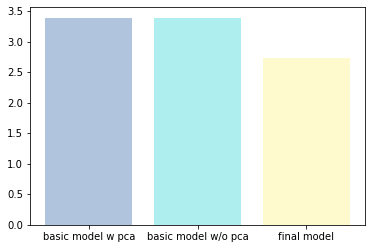

In [21]:
#compare basic model(w pca, w/o pca, final model)
e_combo = [g_error, g_error1, error10]
name = ['basic model w pca', 'basic model w/o pca', 'final model']
c = ['lightsteelblue', 'paleturquoise', 'lemonchiffon']
plt.bar(name, e_combo, color = c)
plt.show()